<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-08 23:36:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  44.0MB/s    in 0.8s    

2024-04-08 23:36:25 (44.0 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [1]:
import pandas as pd
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [6]:
# your code goes here
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT * FROM master
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)


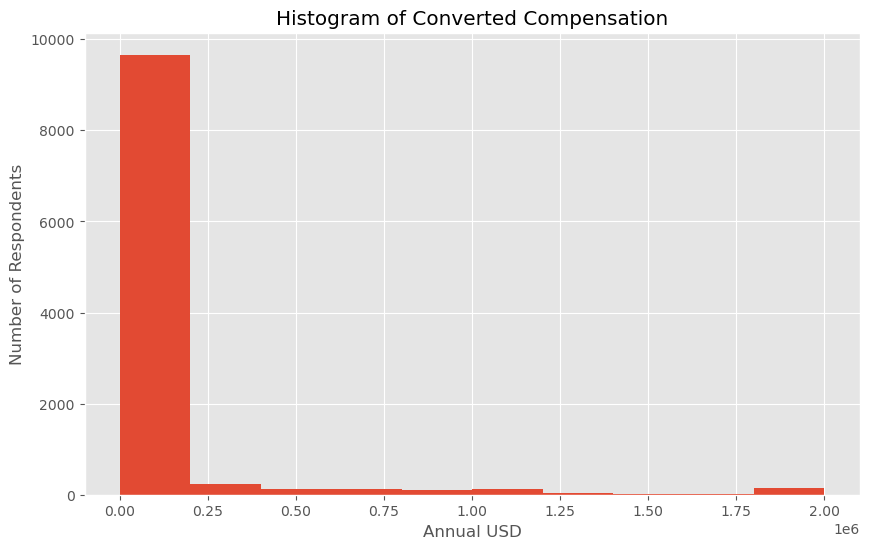

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

df['ConvertedComp'].plot(kind='hist',figsize=(10,6))
plt.title('Histogram of Converted Compensation')
plt.ylabel('Number of Respondents')
plt.xlabel('Annual USD')
plt

plt.show()

### Box Plots


Plot a box plot of `Age.`


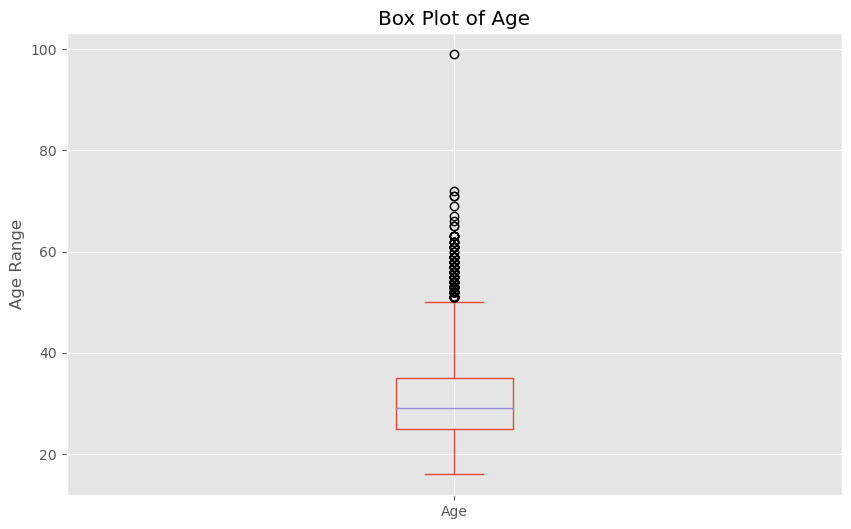

In [16]:
# your code goes here

df['Age'].plot(kind='box',figsize=(10,6))
plt.title('Box Plot of Age')
plt.ylabel('Age Range')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


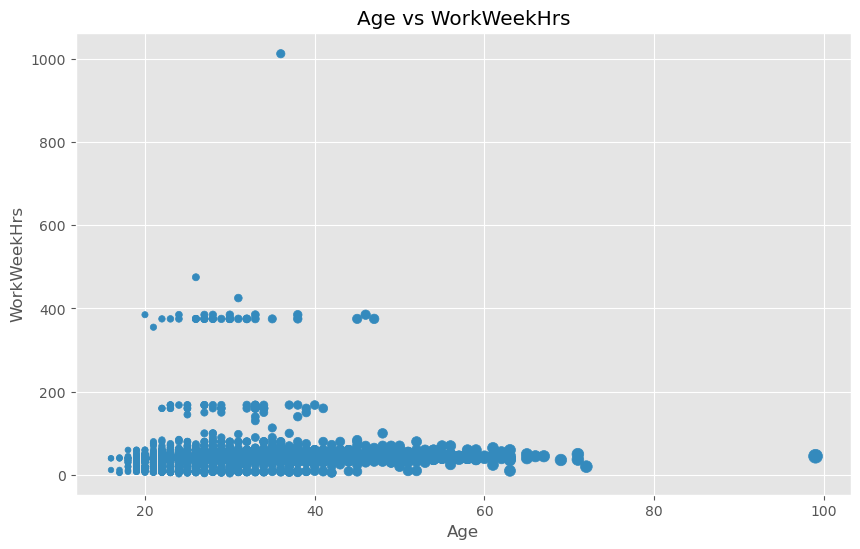

In [20]:

df.plot(kind='scatter', x='Age', y='WorkWeekHrs',figsize=(10,6))
plt.title('Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [27]:
norm_Age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

In [28]:
norm_Age

0        0.072289
1        0.084337
2        0.144578
3        0.120482
4        0.156627
           ...   
11393    0.240964
11394    0.108434
11395    0.216867
11396    0.108434
11397    0.168675
Name: Age, Length: 11398, dtype: float64

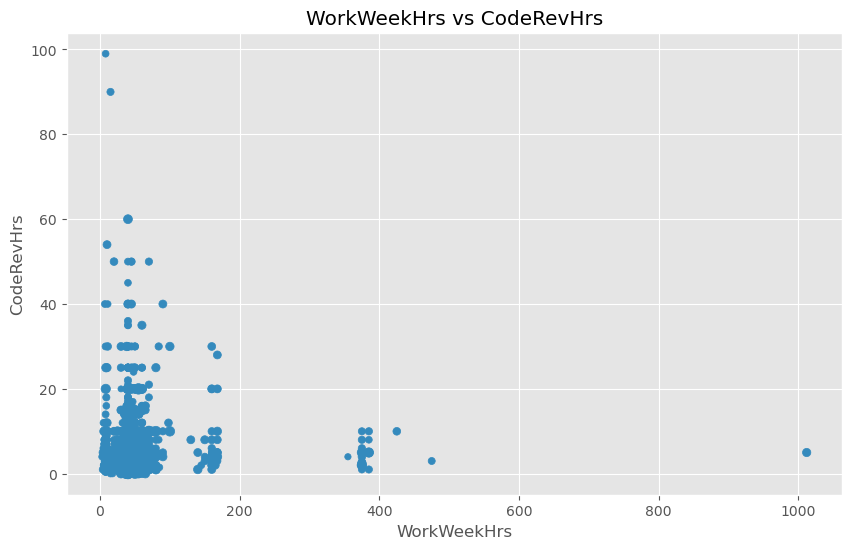

In [33]:
df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', s=df['Age'], figsize=(10,6))
plt.title('WorkWeekHrs vs CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [34]:
%load_ext sql


In [35]:
%sql sqlite:///m4_survey_data.sqlite

'Connected: @m4_survey_data.sqlite'

In [48]:
%config SqlMagic.autopandas = True

In [49]:
df = %sql select * from DatabaseDesireNextYear
type(df)

 * sqlite:///m4_survey_data.sqlite
Done.


pandas.core.frame.DataFrame

In [43]:
df_result= pd.DataFrame(df, columns=['Respondent', 'DatabaseDesireNextYear'])

In [50]:
df.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [52]:
df_top_5 = df.groupby('DatabaseDesireNextYear').count()
df_top_5.sort_values('Respondent', ascending=False, inplace=True)

In [54]:
df_pie=df_top_5.head()

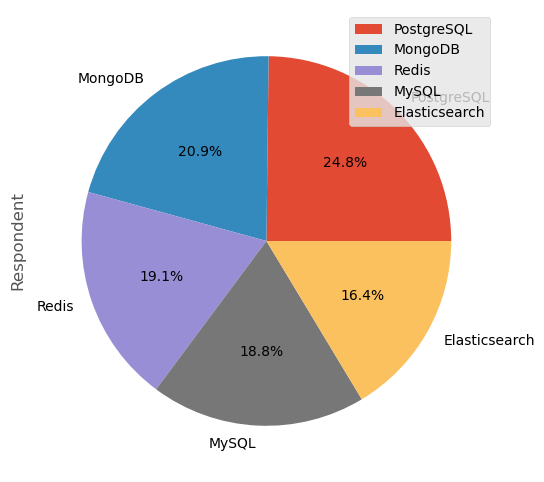

In [57]:
df_pie.plot(kind='pie', figsize=(10,6), y='Respondent', autopct='%1.1f%%')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [58]:
# your code goes here

df_stacked = %sql select CodeRevHrs, WorkWeekHrs, Age from master where Age >= 30 and Age <=35
df_stacked.head()

 * sqlite:///m4_survey_data.sqlite
Done.


,CodeRevHrs,WorkWeekHrs,Age
0,3.0,8.0,31.0
1,2.0,40.0,34.0
2,2.0,40.0,32.0
3,15.0,42.0,34.0
4,2.0,40.0,33.0


In [62]:
df_stacked.groupby(['CodeRevHrs','Age'])['WorkWeekHrs'].median().sort_values(ascending=False).unstack()

Age,30.0,31.0,32.0,33.0,34.0,35.0
CodeRevHrs,,,,,,
0.00,42.0,40.00,42.0,37.5,NaN,37.0
0.50,40.0,38.75,38.0,45.0,NaN,40.0
1.00,40.0,40.00,40.0,40.0,40.0,40.0
1.50,45.0,NaN,50.0,42.0,NaN,NaN
2.00,40.0,40.00,40.0,40.0,40.0,40.0
2.50,NaN,NaN,40.0,NaN,NaN,NaN
3.00,40.0,40.00,40.0,40.0,40.0,40.0
4.00,40.0,40.00,40.0,40.0,40.0,40.0
5.00,40.0,40.00,40.0,40.0,40.0,40.0


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
# your code goes here



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [65]:
# your code goes here
df = %sql select MainBranch from master
df.value_counts()


 * sqlite:///m4_survey_data.sqlite
Done.


MainBranch                                                                   
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
dtype: int64

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
